In [27]:
import pandas as panda
from sklearn import linear_model
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [28]:
# Read date from file and change date to ordinal time (number) so it can be used in linear regression

dataset = panda.read_csv('Ruter_data.csv', delimiter=';')
dataset['Dato'] = panda.to_datetime(dataset['Dato'])
dataset['Dato'] = dataset['Dato'].map(dt.datetime.toordinal)

dataset

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,737706,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,737652,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,737492,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,737633,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,737664,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,737704,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2
5996,10010-2020-06-23T05:54:00+02:00,737599,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2
5997,2007-2020-06-11T17:22:00+02:00,737735,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3
5998,10004-2020-08-13T04:59:00+02:00,737650,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5


In [29]:
# Change the specific bus to use in the algorithm to 150

dataset = dataset[dataset['Linjenavn'] == '150']

dataset

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,737706,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,737652,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,737492,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,737633,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,737664,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,15008-2020-07-27T22:54:00+02:00,737633,Oslo,Indre By,Sentrum,Nationaltheatret (plf F i Munkedamsv m Stortin...,St. Olavs plass (mot Storgata),Lokal,Viken,150,0,23:35:40,23:35:47,23:34:00,23:34:00,112,1
5427,21001-2020-08-15T07:18:00+02:00,737652,Oslo,Vest,Ullern,Vækerø (E18 på nordsiden mot Lysaker),Lysaker stasjon (Plattform A),Lokal,Viken,150,1,07:34:02,07:34:08,07:33:00,07:33:00,112,1
5429,21002-2020-08-02T17:33:00+02:00,737463,Viken,Vest,Bærum,Godthåb,Steinskogen gravlund,Lokal,Viken,150,1,18:09:48,18:10:10,18:07:00,18:07:00,112,-3
5431,15004-2020-08-13T16:35:00+02:00,737650,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,16:49:50,16:49:53,16:37:00,16:37:00,112,2


In [30]:
# Remove outliers so they don't skew the linear regression model
threshold_max = dataset['Passasjerer_Ombord'].quantile(0.95)
threshold_min = dataset['Passasjerer_Ombord'].quantile(0.05)

dataset = dataset[(dataset['Passasjerer_Ombord']<threshold_max) & (dataset['Passasjerer_Ombord']>threshold_min)]

In [31]:
input = dataset.drop(['TurId', 'Fylke', 'Område', 'Kommune', 'Holdeplass_Fra', 'Holdeplass_Til',
                      'Linjetype', 'Linjefylke', 'Linjenavn', 'Linjeretning', 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra',
                     'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra', 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra',
                     'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra', 'Kjøretøy_Kapasitet'], axis='columns')
input.head(10)

,Dato,Passasjerer_Ombord
0,737706,5
1,737652,5
2,737492,6
3,737633,10
4,737664,10
6,737634,1
7,737633,-1
8,737653,2
9,737650,4
11,737654,-2


In [32]:
x = input.iloc[:, :-1].values
y = input.iloc[:, 1].values

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [34]:
regObj = linear_model.LinearRegression()
regObj.fit(x_train,y_train)

LinearRegression()

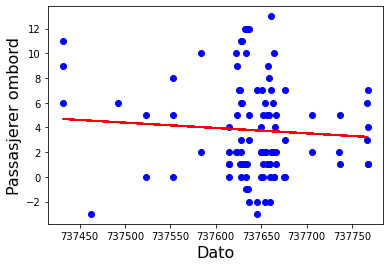

In [35]:
plt.xlabel('Dato', fontsize=16)
plt.ylabel('Passasjerer ombord', fontsize=16)

plt.scatter(dataset.Dato, dataset.Passasjerer_Ombord,color='blue')
plt.plot(dataset.Dato,regObj.predict(dataset[['Dato']]),color='red')

In [36]:
# Predict passengers on the 1st of january 2021

def convertDateStringToOrdinal(dateString):
    return panda.to_datetime(dateString).toordinal()

regObj.predict([[convertDateStringToOrdinal("01.01.2021")]])

array([3.13101333])

In [37]:
# Check how accurate the algorithm is based on dates with set data

y_pred = regObj.predict(x_test)

df = panda.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0,4.289843
1,12,3.801232
2,6,4.423887
3,4,3.675836
4,2,3.740696
5,0,4.160123
6,3,3.239113
7,1,3.364509
8,7,3.840148
9,6,3.835824


In [38]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
regObj.score(x_test, y_test)

Mean Absolute Error: 2.6483264885205697
Mean Squared Error: 10.713119746826814
Root Mean Squared Error: 3.273090244222853


0.054237938925022045